In [ ]:
# Preparing Data
# Building Model
# Train Model
# Evaluate Model

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.0.1+cu118'

In [2]:
#Ground Truth
weight = 0.7
bias = 0.3

#Create Data
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
#Create Train/Test Split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
    plt.legend(prop={"size":14})
    plt.show()

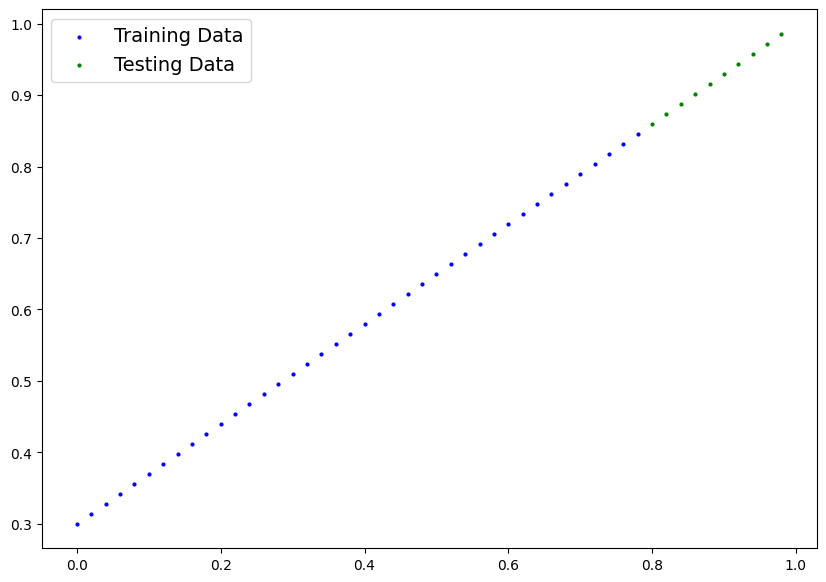

In [5]:
plot_predictions()

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [11]:
#Set manual seed
torch.manual_seed(42)

#Create Model Instance
model = LinearRegressionModel()
model.state_dict() #Print Model Parameters stored in nn.Parameter

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

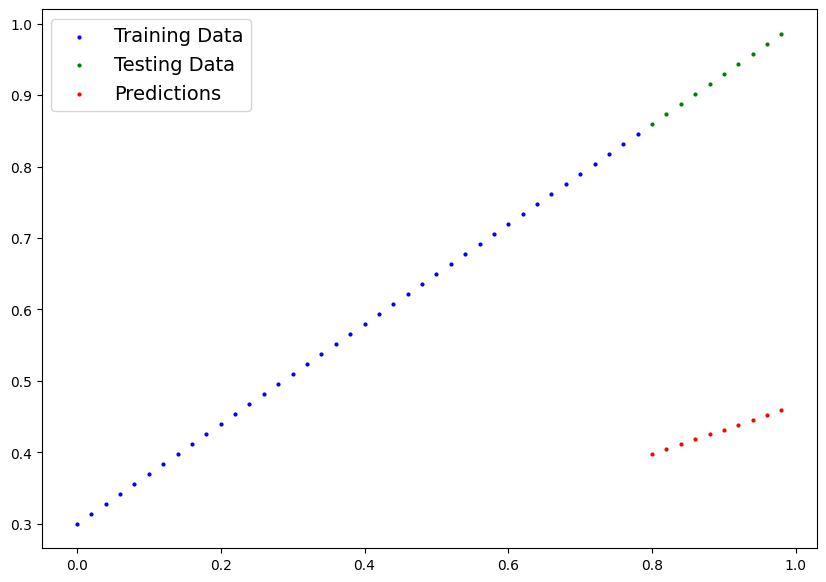

In [12]:
#To make predictions
with torch.inference_mode():
    y_preds = model(X_test)
plot_predictions(predictions=y_preds)

In [13]:
#Loss function
loss_fn = nn.L1Loss() #Same as Mean Absolute Error (MAE)
#Optimizer
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01) #Stochastic Gradient Descent

In [16]:
#Number of iterations
epochs = 200
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    #Training Loop
    #0. Set the model to training mode
    model.train()
    #1. Forward pass
    y_pred = model(X_train)
    #2. Calculate Loss
    loss = loss_fn(y_pred,y_train)
    #3. Zero Grad
    optimizer.zero_grad()
    #4. Backward Pass
    loss.backward()
    #5. Update the Optimizer
    optimizer.step()

    #Testing Loop
    #0. Set the model to eval mode
    model.eval()
    with torch.inference_mode():
        #1. Forward Pass
        test_pred = model(X_test)
        #2. Calculate Loss
        test_loss = loss_fn(test_pred,y_test)
        #3. Calculate Accuracy
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")


Epoch: 0 | Train Loss: 0.0245 | Test Loss: 0.0565
Epoch: 10 | Train Loss: 0.0210 | Test Loss: 0.0482
Epoch: 20 | Train Loss: 0.0176 | Test Loss: 0.0406
Epoch: 30 | Train Loss: 0.0142 | Test Loss: 0.0323
Epoch: 40 | Train Loss: 0.0107 | Test Loss: 0.0241
Epoch: 50 | Train Loss: 0.0073 | Test Loss: 0.0165
Epoch: 60 | Train Loss: 0.0039 | Test Loss: 0.0082
Epoch: 70 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 80 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 90 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 100 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 110 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 120 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 130 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 140 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 150 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 160 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 170 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 180 | Train Loss: 0.0089 | Test Loss: 0.0050
Epoch: 190 | Train Loss

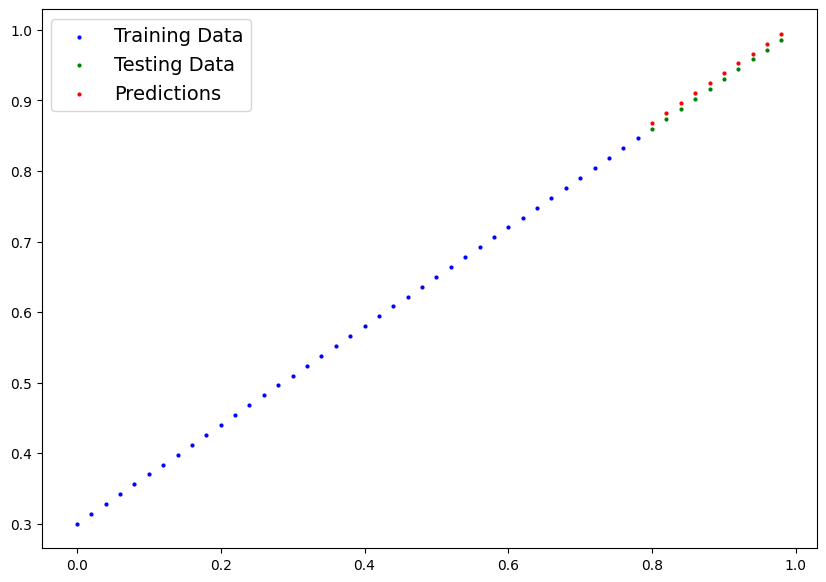

In [17]:
with torch.inference_mode():
    y_preds_new = model(X_test)
plot_predictions(predictions=y_preds_new)